#  Computer Security 1


## Group 2

### Packets creation with Scapy

In [1]:
import scapy
import scapy.all as scapyall

In [2]:
from scapy.all import send, sendp, sr, srp, IP, ICMP

In [3]:
packet_1 = IP(dst = "google.com")/ICMP()
packet_1

<IP  frag=0 proto=icmp dst=Net('google.com') |<ICMP  |>>

In [4]:
packet_1.show()

###[ IP ]### 
  version   = 4
  ihl       = None
  tos       = 0x0
  len       = None
  id        = 1
  flags     = 
  frag      = 0
  ttl       = 64
  proto     = icmp
  chksum    = None
  src       = 192.168.1.97
  dst       = Net('google.com')
  \options   \
###[ ICMP ]### 
     type      = echo-request
     code      = 0
     chksum    = None
     id        = 0x0
     seq       = 0x0



In [5]:
packet_2 = IP(dst = "google.com")/ICMP()/"Hello"
packet_2.show()

###[ IP ]### 
  version   = 4
  ihl       = None
  tos       = 0x0
  len       = None
  id        = 1
  flags     = 
  frag      = 0
  ttl       = 64
  proto     = icmp
  chksum    = None
  src       = 192.168.1.97
  dst       = Net('google.com')
  \options   \
###[ ICMP ]### 
     type      = echo-request
     code      = 0
     chksum    = None
     id        = 0x0
     seq       = 0x0
###[ Raw ]### 
        load      = 'Hello'



### Sending the packets with Scapy

In [6]:
import sys
from scapy.all import send, sendp, sr, sr1, srp, IP, ICMP, UDP, DNS, DNSQR, TCP, Ether

In [7]:
packet_1 = Ether()/IP(dst="172.16.73.24",ttl=(1,4))
sendp(packet_1)


Sent 4 packets.


In [8]:
packet_2 = IP(dst="192.168.30.45")/ICMP()
send(packet_2)


Sent 1 packets.


### sending and receiving packets with Scapy

In [9]:
packet_1 = (IP(dst="www.slashdot.org")/ICMP()/"Hi!")

In [10]:
sr(packet_1)

Begin emission:
Finished sending 1 packets.

Received 6 packets, got 1 answers, remaining 0 packets


(<Results: TCP:0 UDP:0 ICMP:1 Other:0>,
 <Unanswered: TCP:0 UDP:0 ICMP:0 Other:0>)

In [11]:
packet_2 = IP(dst="192.168.1.1")/TCP(sport=666,dport=(440,443),flags="S")
sr(packet_2)

Begin emission:
Finished sending 4 packets.

Received 8 packets, got 4 answers, remaining 0 packets


(<Results: TCP:4 UDP:0 ICMP:0 Other:0>,
 <Unanswered: TCP:0 UDP:0 ICMP:0 Other:0>)

In [12]:
packet_2 = IP(dst="192.168.1.1")/TCP(sport=666,dport=(440,443),flags="S")
sr1(packet_2)

Begin emission:
Finished sending 4 packets.

Received 8 packets, got 4 answers, remaining 0 packets


<IP  version=4 ihl=5 tos=0x0 len=40 id=3101 flags=DF frag=0 ttl=64 proto=tcp chksum=0xab00 src=192.168.1.1 dst=192.168.1.97 |<TCP  sport=440 dport=doom seq=0 ack=1 dataofs=5 reserved=0 flags=RA window=0 chksum=0x27cb urgptr=0 |>>

In [13]:
ans, unans = sr(packet_2)

Begin emission:
Finished sending 4 packets.

Received 13 packets, got 4 answers, remaining 0 packets


In [14]:
ans

<Results: TCP:4 UDP:0 ICMP:0 Other:0>

In [15]:
unans

<Unanswered: TCP:0 UDP:0 ICMP:0 Other:0>

In [16]:
ans.summary()

IP / TCP 192.168.1.97:doom > 192.168.1.1:440 S ==> IP / TCP 192.168.1.1:440 > 192.168.1.97:doom RA
IP / TCP 192.168.1.97:doom > 192.168.1.1:441 S ==> IP / TCP 192.168.1.1:441 > 192.168.1.97:doom RA
IP / TCP 192.168.1.97:doom > 192.168.1.1:442 S ==> IP / TCP 192.168.1.1:442 > 192.168.1.97:doom RA
IP / TCP 192.168.1.97:doom > 192.168.1.1:https S ==> IP / TCP 192.168.1.1:https > 192.168.1.97:doom SA


In [17]:
packet_3 = IP(dst="172.16.6.7",src="1.2.3.4")/TCP(dport=80, flags="S")
sendp(packet_3)


Sent 1 packets.


In [ ]:
packets_3_ = srp(packet_3, retry=4, timeout=1.5, filter="host 1.2.3.4 and port 80")

In [19]:
 packets_3_ = srp(packet_3, retry=4, timeout=1.5, filter="port 80")

Begin emission:
Finished sending 1 packets.
Begin emission:
Finished sending 1 packets.
Begin emission:
Finished sending 1 packets.
Begin emission:
Finished sending 1 packets.
Begin emission:
Finished sending 1 packets.

Received 0 packets, got 0 answers, remaining 1 packets


### Capturing packets with Scapy 

In [1]:
from scapy.all import *
import netifaces

In [2]:
sniffed_packets = sniff(count = 10)

In [3]:
sniffed_packets

<Sniffed: TCP:0 UDP:2 ICMP:0 Other:8>

In [5]:
sniffed_packets.show()

0000 Ether / ARP who has 192.168.1.40 says 192.168.1.1 / Padding
0001 Ether / ARP who has 192.168.1.40 says 192.168.1.1 / Padding
0002 Ether / ARP who has 192.168.1.25 says 192.168.1.1 / Padding
0003 Ether / ARP who has 192.168.1.40 says 192.168.1.1 / Padding
0004 Ether / ARP who has 192.168.1.25 says 192.168.1.1 / Padding
0005 Ether / ARP who has 192.168.1.40 says 192.168.1.1 / Padding
0006 Ether / IP / UDP 192.168.1.19:58598 > 239.255.255.250:ssdp / Raw
0007 Ether / ARP who has 192.168.1.25 says 192.168.1.1 / Padding
0008 Ether / ARP who has 192.168.1.40 says 192.168.1.1 / Padding
0009 Ether / IP / UDP 192.168.1.19:58598 > 239.255.255.250:ssdp / Raw


In [6]:
sniffed_packets[0]

<Ether  dst=ff:ff:ff:ff:ff:ff src=1c:5f:2b:a9:df:bf type=ARP |<ARP  hwtype=0x1 ptype=IPv4 hwlen=6 plen=4 op=who-has hwsrc=1c:5f:2b:a9:df:bf psrc=192.168.1.1 hwdst=00:00:00:00:00:00 pdst=192.168.1.40 |<Padding  load='AIMS\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00' |>>>

In [26]:
sniffed_packets[0].show()

###[ Ethernet ]### 
  dst       = ff:ff:ff:ff:ff:ff
  src       = 60:38:e0:cb:5e:c8
  type      = ARP
###[ ARP ]### 
     hwtype    = 0x1
     ptype     = IPv4
     hwlen     = 6
     plen      = 4
     op        = who-has
     hwsrc     = 60:38:e0:cb:5e:c8
     psrc      = 192.168.1.1
     hwdst     = 00:00:00:00:00:00
     pdst      = 192.168.1.138



In [27]:
sniffed_packets = sniff(count = 100)

In [28]:
sniffed_packets

<Sniffed: TCP:0 UDP:40 ICMP:0 Other:60>

In [29]:
sniffed_packets.show()

0000 Ether / IP / UDP / DNS Qry "b'_sane-port._tcp.local.'" 
0001 Ether / ARP who has 192.168.1.224 says 192.168.1.1
0002 Ether / ARP who has 192.168.1.99 says 192.168.1.1
0003 Ether / ARP who has 192.168.1.185 says 192.168.1.1
0004 Ether / IP / UDP 192.168.1.172:50599 > 239.255.255.250:ssdp / Raw
0005 Ether / IPv6 / ICMPv6ND_RS / ICMPv6 Neighbor Discovery Option - Source Link-Layer Address 70:9f:a9:69:29:dd
0006 Ether / ARP who has 192.168.1.224 says 192.168.1.1
0007 Ether / ARP who has 192.168.1.99 says 192.168.1.1
0008 Ether / IP / UDP 192.168.1.172:50599 > 239.255.255.250:ssdp / Raw
0009 Ether / IP / UDP 192.168.1.162:51140 > 239.255.255.250:ssdp / Raw
0010 Ether / ARP who has 192.168.1.224 says 192.168.1.1
0011 Ether / ARP who has 192.168.1.99 says 192.168.1.1
0012 Ether / IP / UDP 192.168.1.172:50599 > 239.255.255.250:ssdp / Raw
0013 Ether / IP / UDP 192.168.1.50:52762 > 239.255.255.250:ssdp / Raw
0014 Ether / ARP who has 192.168.1.99 says 192.168.1.1
0015 Ether / ARP who has 192

In [40]:
sniffed_packets[0]

<Ether  dst=b0:fc:36:6c:83:27 src=bc:85:56:86:a5:e5 type=IPv4 |<IP  version=4 ihl=5 tos=0x0 len=282 id=21068 flags= frag=0 ttl=255 proto=udp chksum=0xc5ab src=192.168.1.55 dst=224.0.0.251 |<UDP  sport=5353 dport=5353 len=262 chksum=0xe81b |<DNS  id=0 qr=1 opcode=QUERY aa=1 tc=0 rd=0 ra=0 z=0 ad=0 cd=0 rcode=ok qdcount=0 ancount=4 nscount=0 arcount=3 qd=None an=<DNSRR  rrname='55.1.168.192.in-addr.arpa.' type=PTR rclass=32769 ttl=120 rdlen=None rdata='DESKTOP-P3T74F4.local.' |<DNSRR  rrname='B.5.8.9.2.8.7.D.6.F.D.D.7.C.1.C.0.0.0.0.0.0.0.0.0.0.0.0.0.8.E.F.ip6.arpa.' type=PTR rclass=32769 ttl=120 rdlen=None rdata='DESKTOP-P3T74F4.local.' |<DNSRR  rrname='DESKTOP-P3T74F4.local.' type=A rclass=32769 ttl=120 rdlen=None rdata=192.168.1.55 |<DNSRR  rrname='DESKTOP-P3T74F4.local.' type=AAAA rclass=32769 ttl=120 rdlen=None rdata=fe80::c1c7:ddf6:d782:985b |>>>> ns=None ar=<DNSRRNSEC  rrname='55.1.168.192.in-addr.arpa.' type=NSEC rclass=32769 ttl=120 rdlen=None nextname='55.1.168.192.in-addr.arpa.

In [30]:
sniffed_packets[1]

<Ether  dst=ff:ff:ff:ff:ff:ff src=60:38:e0:cb:5e:c8 type=ARP |<ARP  hwtype=0x1 ptype=IPv4 hwlen=6 plen=4 op=who-has hwsrc=60:38:e0:cb:5e:c8 psrc=192.168.1.1 hwdst=00:00:00:00:00:00 pdst=192.168.1.224 |>>

In [31]:
sniffed_packets[0].show()

###[ Ethernet ]### 
  dst       = 01:00:5e:00:00:fb
  src       = 28:3a:4d:8e:f8:e7
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 67
     id        = 10597
     flags     = DF
     frag      = 0
     ttl       = 255
     proto     = udp
     chksum    = 0xaf6c
     src       = 192.168.1.52
     dst       = 224.0.0.251
     \options   \
###[ UDP ]### 
        sport     = 5353
        dport     = 5353
        len       = 47
        chksum    = 0x8fb7
###[ DNS ]### 
           id        = 0
           qr        = 0
           opcode    = QUERY
           aa        = 0
           tc        = 0
           rd        = 0
           ra        = 0
           z         = 0
           ad        = 0
           cd        = 0
           rcode     = ok
           qdcount   = 1
           ancount   = 0
           nscount   = 0
           arcount   = 0
           \qd        \
            |###[ DNS Question Record ]### 
            |  qname 

In [32]:
sniffed_packets[0][UDP]

<UDP  sport=5353 dport=5353 len=47 chksum=0x8fb7 |<DNS  id=0 qr=0 opcode=QUERY aa=0 tc=0 rd=0 ra=0 z=0 ad=0 cd=0 rcode=ok qdcount=1 ancount=0 nscount=0 arcount=0 qd=<DNSQR  qname='_sane-port._tcp.local.' qtype=PTR qclass=IN |> an=None ns=None ar=None |>>

In [45]:
sniffed_packets[0][UDP].show()

###[ UDP ]### 
  sport     = 5353
  dport     = 5353
  len       = 262
  chksum    = 0xe81b
###[ DNS ]### 
     id        = 0
     qr        = 1
     opcode    = QUERY
     aa        = 1
     tc        = 0
     rd        = 0
     ra        = 0
     z         = 0
     ad        = 0
     cd        = 0
     rcode     = ok
     qdcount   = 0
     ancount   = 4
     nscount   = 0
     arcount   = 3
     qd        = None
     \an        \
      |###[ DNS Resource Record ]### 
      |  rrname    = '55.1.168.192.in-addr.arpa.'
      |  type      = PTR
      |  rclass    = 32769
      |  ttl       = 120
      |  rdlen     = None
      |  rdata     = 'DESKTOP-P3T74F4.local.'
      |###[ DNS Resource Record ]### 
      |  rrname    = 'B.5.8.9.2.8.7.D.6.F.D.D.7.C.1.C.0.0.0.0.0.0.0.0.0.0.0.0.0.8.E.F.ip6.arpa.'
      |  type      = PTR
      |  rclass    = 32769
      |  ttl       = 120
      |  rdlen     = None
      |  rdata     = 'DESKTOP-P3T74F4.local.'
      |###[ DNS Resource Record ]### 
    

In [35]:
sniffed_packets[DNS]

<DNS from Sniffed: TCP:0 UDP:5 ICMP:0 Other:0>

In [36]:
sniffed_packets[DNS].show()

0000 Ether / IP / UDP / DNS Qry "b'_sane-port._tcp.local.'" 
0001 Ether / IPv6 / UDP / DNS Qry "b'_ftp._tcp.local.'" 
0002 Ether / IP / UDP / DNS Qry "b'_ftp._tcp.local.'" 
0003 Ether / IP / UDP / DNS Qry "b'_37F83649._sub._googlecast._tcp.local.'" 
0004 Ether / IP / UDP / DNS Qry "b'_37F83649._sub._googlecast._tcp.local.'" 


In [37]:
tcp_segment = sniffed_packets[DNS]

In [38]:
tcp_segment.payload

AttributeError: 'list' object has no attribute 'payload'

In [39]:
tcp_segment.fields

AttributeError: 'list' object has no attribute 'fields'

In [40]:
interface_all = netifaces.interfaces()
interface_all

['{772E5191-626A-49F3-BDCD-0866FFFC1F45}',
 '{E439A95A-2075-4DD9-B5C4-2ACCB5DCD695}',
 '{22B495B6-FB7D-491D-AC0A-83E4E3EA84F6}',
 '{387CDE24-FA9C-4C46-8182-AC7F3665AC31}',
 '{654DD818-2C24-4C65-9247-C5942AA32187}',
 '{367751C4-618B-4395-B4D0-74FD88CD2655}',
 '{A7CC4605-FFD0-11E9-83E4-806E6F6E6963}']

In [41]:
netifaces.ifaddresses('{772E5191-626A-49F3-BDCD-0866FFFC1F45}')

{-1000: [{'addr': '8c:16:45:9e:fe:91'}],
 23: [{'addr': 'fe80::3853:1e6:54f:8803%9',
   'netmask': 'ffff:ffff:ffff:ffff::/64',
   'broadcast': 'fe80::ffff:ffff:ffff:ffff%9'}]}

In [42]:
len(interface_all)

7

In [43]:
a = interface_all[0]
a

'{772E5191-626A-49F3-BDCD-0866FFFC1F45}'

In [44]:
b = interface_all[1]
b

'{E439A95A-2075-4DD9-B5C4-2ACCB5DCD695}'

In [45]:
c = interface_all[2]
c

'{22B495B6-FB7D-491D-AC0A-83E4E3EA84F6}'

In [46]:
d = interface_all[3]
d

'{387CDE24-FA9C-4C46-8182-AC7F3665AC31}'

In [47]:
e = interface_all[4]
e

'{654DD818-2C24-4C65-9247-C5942AA32187}'

In [48]:
f = interface_all[5]
f

'{367751C4-618B-4395-B4D0-74FD88CD2655}'

In [49]:
g = interface_all[6]
g

'{A7CC4605-FFD0-11E9-83E4-806E6F6E6963}'

In [50]:
lis = [a,b,c,d,e,f,g]
lis

['{772E5191-626A-49F3-BDCD-0866FFFC1F45}',
 '{E439A95A-2075-4DD9-B5C4-2ACCB5DCD695}',
 '{22B495B6-FB7D-491D-AC0A-83E4E3EA84F6}',
 '{387CDE24-FA9C-4C46-8182-AC7F3665AC31}',
 '{654DD818-2C24-4C65-9247-C5942AA32187}',
 '{367751C4-618B-4395-B4D0-74FD88CD2655}',
 '{A7CC4605-FFD0-11E9-83E4-806E6F6E6963}']

In [49]:
len(lis)

7

In [50]:
netifaces.ifaddresses(lis[0])

{-1000: [{'addr': '8c:16:45:9e:fe:91'}],
 23: [{'addr': 'fe80::3853:1e6:54f:8803%9',
   'netmask': 'ffff:ffff:ffff:ffff::/64',
   'broadcast': 'fe80::ffff:ffff:ffff:ffff%9'}]}

In [51]:
n = len(lis)
for k in range(n):
    print(netifaces.ifaddresses(lis[k]))

{-1000: [{'addr': '8c:16:45:9e:fe:91'}], 23: [{'addr': 'fe80::3853:1e6:54f:8803%9', 'netmask': 'ffff:ffff:ffff:ffff::/64', 'broadcast': 'fe80::ffff:ffff:ffff:ffff%9'}]}
{-1000: [{'addr': '0a:00:27:00:00:14'}], 23: [{'addr': 'fe80::5c80:cd92:b97e:2591%20', 'netmask': 'ffff:ffff:ffff:ffff::/64', 'broadcast': 'fe80::ffff:ffff:ffff:ffff%20'}], 2: [{'addr': '192.168.56.1', 'netmask': '255.255.255.0', 'broadcast': '192.168.56.255'}]}
{-1000: [{'addr': 'b2:fc:36:6c:83:27'}], 23: [{'addr': 'fe80::2c9a:2cf4:e920:9ed4%4', 'netmask': 'ffff:ffff:ffff:ffff::/64', 'broadcast': 'fe80::ffff:ffff:ffff:ffff%4'}]}
{-1000: [{'addr': 'b0:fc:36:6c:83:27'}], 23: [{'addr': 'fe80::a1d2:4336:fa55:a49d%7', 'netmask': 'ffff:ffff:ffff:ffff::/64', 'broadcast': 'fe80::ffff:ffff:ffff:ffff%7'}]}
{-1000: [{'addr': 'b0:fc:36:6c:83:27'}], 23: [{'addr': 'fe80::fc90:5fee:f8c5:6792%8', 'netmask': 'ffff:ffff:ffff:ffff::/64', 'broadcast': 'fe80::ffff:ffff:ffff:ffff%8'}], 2: [{'addr': '192.168.1.97', 'netmask': '255.255.255.0'

In [52]:
eth = []
for i in range(n):
    val = netifaces.ifaddresses(lis[k])
    eth.append(val)

In [53]:
eth

[{-1000: [{'addr': ''}],
  23: [{'addr': '::1',
    'netmask': 'ffff:ffff:ffff:ffff:ffff:ffff:ffff:ffff/128',
    'broadcast': '::1'}],
  2: [{'addr': '127.0.0.1',
    'netmask': '255.0.0.0',
    'broadcast': '127.255.255.255'}]},
 {-1000: [{'addr': ''}],
  23: [{'addr': '::1',
    'netmask': 'ffff:ffff:ffff:ffff:ffff:ffff:ffff:ffff/128',
    'broadcast': '::1'}],
  2: [{'addr': '127.0.0.1',
    'netmask': '255.0.0.0',
    'broadcast': '127.255.255.255'}]},
 {-1000: [{'addr': ''}],
  23: [{'addr': '::1',
    'netmask': 'ffff:ffff:ffff:ffff:ffff:ffff:ffff:ffff/128',
    'broadcast': '::1'}],
  2: [{'addr': '127.0.0.1',
    'netmask': '255.0.0.0',
    'broadcast': '127.255.255.255'}]},
 {-1000: [{'addr': ''}],
  23: [{'addr': '::1',
    'netmask': 'ffff:ffff:ffff:ffff:ffff:ffff:ffff:ffff/128',
    'broadcast': '::1'}],
  2: [{'addr': '127.0.0.1',
    'netmask': '255.0.0.0',
    'broadcast': '127.255.255.255'}]},
 {-1000: [{'addr': ''}],
  23: [{'addr': '::1',
    'netmask': 'ffff:ffff:ff

In [54]:
eth0 = eth[0]
eth0

{-1000: [{'addr': ''}],
 23: [{'addr': '::1',
   'netmask': 'ffff:ffff:ffff:ffff:ffff:ffff:ffff:ffff/128',
   'broadcast': '::1'}],
 2: [{'addr': '127.0.0.1',
   'netmask': '255.0.0.0',
   'broadcast': '127.255.255.255'}]}

In [ ]:
packet_4 = IP(dst="127.0.0.1",src="192.168.1.45")/TCP(dport=80, flags="S")

In [59]:
interface = eth0
def print_capture_packet(packet):
    ip_layer = packet.getlayer(IP)
    print("[!] New Packet: {src} -> {dst}".format(src=ip_layer.src, dst=ip_layer.dst))
    print("[*] Start sniffing...")
    #sniff(iface=interface, filter="ip", prn=print_packet)
    sniff(filter="ip", prn=print_capture_packet, timeout=2)
    print("[*] Stop sniffing") 

In [60]:
print_capture_packet(packet_4)

[!] New Packet: 192.168.1.45 -> 127.0.0.1
[*] Start sniffing...
[!] New Packet: 192.168.1.174 -> 239.255.255.250
[*] Start sniffing...
[!] New Packet: 192.168.1.174 -> 239.255.255.250
[*] Start sniffing...
[!] New Packet: 192.168.1.174 -> 239.255.255.250
[*] Start sniffing...
[!] New Packet: 192.168.1.90 -> 239.255.255.250
[*] Start sniffing...
[!] New Packet: 192.168.1.97 -> 192.168.1.1
[*] Start sniffing...
[!] New Packet: 192.168.1.97 -> 52.109.76.32
[*] Start sniffing...
[!] New Packet: 192.168.1.97 -> 52.109.76.32
[*] Start sniffing...
[!] New Packet: 13.107.3.128 -> 192.168.1.97
[*] Start sniffing...
[!] New Packet: 192.168.1.97 -> 51.105.249.239
[*] Start sniffing...
[!] New Packet: 51.105.249.239 -> 192.168.1.97
[*] Start sniffing...
[!] New Packet: 192.168.1.97 -> 51.105.249.239
[*] Start sniffing...
[!] New Packet: 192.168.1.62 -> 224.0.0.251
[*] Start sniffing...
[!] New Packet: 192.168.1.90 -> 239.255.255.250
[*] Start sniffing...
[!] New Packet: 13.107.3.128 -> 192.168.1.9

In [61]:
scapyall.sniff?

In [64]:
import matplotlib.pyplot as plt

[!] New Packet: 0.0.0.0 -> 255.255.255.255
[*] Start sniffing...
[!] New Packet: 192.168.1.97 -> 172.217.168.174
[*] Start sniffing...
[!] New Packet: 172.217.168.174 -> 192.168.1.97
[*] Start sniffing...
[!] New Packet: 192.168.1.15 -> 224.0.0.1
[*] Start sniffing...
[!] New Packet: 192.168.1.97 -> 64.233.184.188
[*] Start sniffing...
[!] New Packet: 64.233.184.188 -> 192.168.1.97
[*] Start sniffing...
[!] New Packet: 192.168.1.97 -> 239.255.255.250
[*] Start sniffing...
[!] New Packet: 192.168.1.133 -> 224.0.0.251
[*] Start sniffing...
[!] New Packet: 192.168.1.133 -> 224.0.0.251
[*] Start sniffing...
[!] New Packet: 192.168.1.133 -> 224.0.0.251
[*] Start sniffing...
[!] New Packet: 192.168.1.97 -> 216.58.201.67
[*] Start sniffing...
[!] New Packet: 216.58.201.67 -> 192.168.1.97
[*] Start sniffing...
[!] New Packet: 216.58.201.67 -> 192.168.1.97
[*] Start sniffing...
[!] New Packet: 192.168.1.97 -> 216.58.201.110
[*] Start sniffing...
[!] New Packet: 216.58.201.110 -> 192.168.1.97
[*

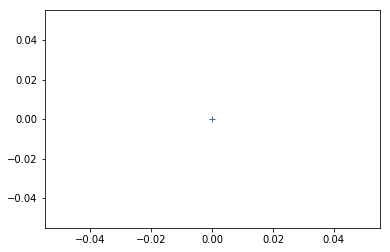

In [65]:
pkt = sniff(filter="ip", prn=print_capture_packet, timeout=2)
pkt.plot(lambda x:x[1].id)
plt.show()

Begin emission:
Finished sending 500 packets.

Received 870 packets, got 0 answers, remaining 500 packets


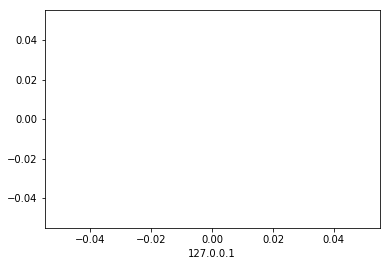

In [62]:
ans, unans = sr(IP(dst="127.0.0.1")/TCP(sport=[RandShort()]*500))
ans.plot(lambda x:x[1].id)
plt.xlabel("127.0.0.1")
plt.show()

Begin emission:
Finished sending 500 packets.

Received 8435 packets, got 488 answers, remaining 12 packets


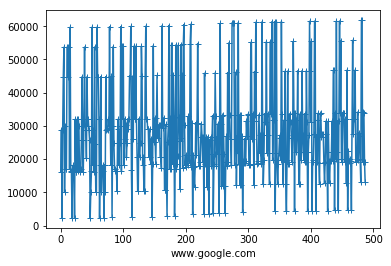

In [56]:
ans, unans = sr(IP(dst="www.google.com")/TCP(sport=[RandShort()]*500))
ans.plot(lambda x:x[1].id)
plt.xlabel("www.google.com")
plt.show()

Begin emission:
Finished sending 500 packets.

Received 22371 packets, got 496 answers, remaining 4 packets


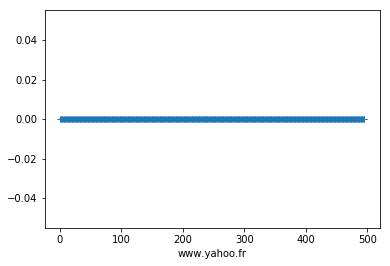

In [57]:
ans, unans = sr(IP(dst="www.yahoo.fr")/TCP(sport=[RandShort()]*500))
ans.plot(lambda x:x[1].id)
plt.xlabel("www.yahoo.fr")
plt.show()